In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 0 tess中的label信息
label1 = pd.read_csv('./Online_Data/trainning_data/label_risk_company.csv',usecols=['entid','CaseType']) #去掉id列
label2 = pd.read_csv('./Online_Data/test_data/test_data.csv')
label2.info()
dff = label1[label1.entid.isin(label2.entid)]
print(dff)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   entid   1392 non-null   int64
dtypes: int64(1)
memory usage: 11.0 KB
           entid  CaseType
38      50899367         2
59     954239726         0
97    1113017293         0
272    799080938         3
299    620868429         2
652   1102534779         0
669    954239726         0
876    243789405         2
1217  1176966297         2
1238   799080938         3
1332  1176966297         2
1349  1176966297         2


In [3]:
# 1 label信息
label= pd.read_csv('./Online_Data/trainning_data/label_risk_company.csv',usecols=['entid','CaseType']) #去掉id列
#label = pd.read_csv('./Online_Data/test_data/test_data.csv')

csv_name = 'data_train_less.csv'
label.info()
label.head(3)
label.describe()
# print((label['CaseType']==0).sum()/2085)
# print((label['CaseType']==1).sum()/2085)
# print((label['CaseType']==2).sum()/2085)
# print((label['CaseType']==3).sum()/2085)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   entid   1392 non-null   int64
dtypes: int64(1)
memory usage: 11.0 KB


entid
count  1.392000e+03
mean   6.178682e+08
std    3.607194e+08
min    1.096060e+05
25%    3.035634e+08
50%    6.357037e+08
75%    9.316159e+08
max    1.233057e+09

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679 entries, 0 to 3678
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   entid            3679 non-null   int64  
 1   ANCHEYEAR_stock  3679 non-null   int64  
 2   INV              3679 non-null   int64  
 3   TRANSAMPR        3671 non-null   float64
 4   TRANSAMAFT       3672 non-null   float64
 5   ALTDATE          3676 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 172.6+ KB
141


entid  ANCHEYEAR_stock  INV  TRANSAMPR  TRANSAMAFT
55     138883672              NaN  NaN        NaN         NaN
56     489434433              NaN  NaN        NaN         NaN
97     200674224              NaN  NaN        NaN         NaN
99     918218034              NaN  NaN        NaN         NaN
100   1068017385              NaN  NaN        NaN         NaN
...          ...              ...  ...        ...         ...
1287   967584770              NaN  NaN        NaN         NaN
1362   434521202              NaN  NaN        NaN         NaN
1363   630123762              NaN  NaN        NaN         NaN
1364   163503960              NaN  NaN        NaN         NaN
1365   117200714              NaN  NaN        NaN         NaN

[144 rows x 5 columns]

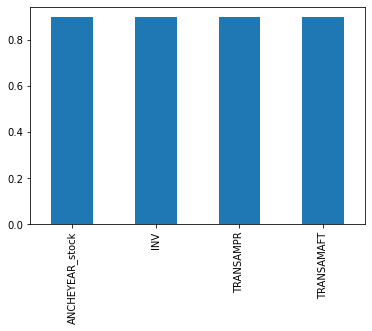

In [4]:
# 2 stock信息
stock = pd.read_csv('./Online_Data/trainning_data/corporate_attributes/company_ar_alterstockinfo.csv')
stock.rename(columns={'ANCHEYEAR':'ANCHEYEAR_stock'}, inplace=True) # 避免col名称重复
stock.info()

# 处理成均值
gb = stock.groupby('entid')
df = pd.DataFrame(gb.mean())

# gb = stock.groupby('entid')['TRANSAMAFT']
# df2 = pd.DataFrame(gb.sum())

# 求交集 
inner_stock = label.merge(df, on='entid', how='left') #根据索引交集拼接
#inner_stock = inner_stock.merge(df2, on='entid', how='left') #根据索引交集拼接

#inner_stock.info()

print(stock.entid[stock.entid.isin(label.entid)].nunique())  #29

# nan可视化
missing = inner_stock.isnull().sum()/len(inner_stock)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

inner_stock[stock.entid.isin(label.entid)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   entid              1392 non-null   int64  
 1   ANCHEYEAR_asserts  249 non-null    float64
 2   ispublic_asserts   249 non-null    float64
 3   ASSGRO             224 non-null    float64
 4   LIAGRO             218 non-null    float64
 5   VENDINC            230 non-null    float64
 6   MAIBUSINC          225 non-null    float64
 7   PROGRO             217 non-null    float64
 8   NETINC             229 non-null    float64
 9   RATGRO             241 non-null    float64
 10  TOTEQU             221 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 130.5 KB
249


entid  ANCHEYEAR_asserts  ispublic_asserts       ASSGRO  \
1      421844157            2015.75               1.0     2.790498   
2      475255424            2014.50               1.0  2680.361029   
7      498015441            2017.00               1.0    32.427435   
10     545175795            2017.00               1.0    30.559649   
12     884853596            2013.00               1.0   998.665906   
...          ...                ...               ...          ...   
1376  1014614801            2017.50               1.0          NaN   
1379   809128331            2015.50               1.0    73.371939   
1380  1209177244            2015.20               1.0   318.250423   
1383   677588828            2014.00               1.0    -0.249361   
1391    50478809            2018.00               1.0     1.320453   

          LIAGRO    VENDINC   MAIBUSINC      PROGRO      NETINC     RATGRO  \
1      -0.516151  -0.554519    0.022774    0.600688   -0.342873   0.137114   
2     518.715800  -0.152490   -0.211802  276.735142  276.468918  70.402031   
7       3.433334  -0.854815    0.463739    1.038905    1.141635   1.098083   
10      1.466470   4.966785    5.281209    5.895409    2.552247  -0.729852   
12      3.584574  -0.928707    0.744443   -3.887347   -0.912310   0.575780   
...          ...        ...         ...         ...         ...        ...   
1376         NaN        NaN         NaN         NaN         NaN  -0.174523   
1379   10.562873  74.067360   73.954119    0.277842    0.224781   2.486982   
1380  180.971078  99.207381  100.279026    3.198135    3.289674   2.080323   
1383    2.241353   0.880836    0.714033   -3.860640   -2.104166   1.440374   
1391    0.645460  -0.458251   -0.487157   -0.678160   -1.440330   0.775025   

           TOTEQU  
1        2.557948  
2     2161.611732  
7       27.225744  
10      29.527601  
12     995.525450  
...           ...  
1376          NaN  
1379    65.278493  
1380   135.386149  
1383    -1.931307  
1391     0.794318  

[249 rows x 11 columns]

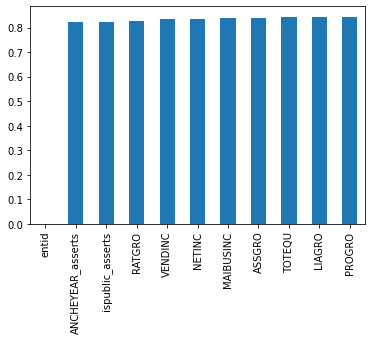

In [5]:
# 3 assets信息
assets = pd.read_csv('./Online_Data/trainning_data/corporate_attributes/company_ar_assetsinfo.csv')
assets.rename(columns={'ANCHEYEAR':'ANCHEYEAR_asserts'}, inplace=True)
assets.rename(columns={'ispublic':'ispublic_asserts'}, inplace=True)
# 处理成均值
gb = assets.groupby('entid')
#gb.agg(['sum', 'idxmax', 'skew'])
df = pd.DataFrame(gb.mean())
# 求交集
inner_assets = label.merge(df, on='entid', how='left') #根据索引交集拼接
inner_assets.info()
print(assets.entid[assets.entid.isin(label.entid)].nunique()) # 61

# nan可视化
missing = inner_assets.isnull().sum()/len(inner_assets)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()


# 与风险类型关系
inner_assets[inner_assets.entid.isin(assets.entid)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 1490
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entid      1491 non-null   int64  
 1   MEMNNUM    152 non-null    float64
 2   FARNUM     147 non-null    float64
 3   ANNNEWMEM  148 non-null    float64
 4   ANNREDMEM  148 non-null    float64
 5   ANCHEYEAR  152 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 81.5 KB
53


<AxesSubplot:>

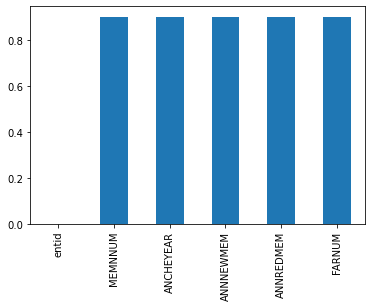

In [6]:
# 4 member
member = pd.read_csv('./Online_Data/trainning_data/corporate_attributes/company_ar_nz.csv')

# 求交集
inner_mem = label.merge(member, on='entid', how='left') #根据索引交集拼接
inner_mem.info()
print(member.entid[member.entid.isin(label.entid)].nunique()) # 1

# nan可视化
missing = inner_mem.isnull().sum()/len(inner_mem)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   entid            1392 non-null   int64  
 1   web_dum          1392 non-null   int64  
 2   ENTTYPE          1392 non-null   int64  
 3   INDUSTRYPHY      1392 non-null   int64  
 4   REGCAP           1392 non-null   float64
 5   REGCAPCUR        1392 non-null   int64  
 6   RECCAP           1392 non-null   float64
 7   PARNUM           131 non-null    float64
 8   LIMPARNUM        131 non-null    float64
 9   PARFORM          115 non-null    object 
 10  EXENUM           1392 non-null   float64
 11  cancel_dum       1392 non-null   int64  
 12  certificate_num  202 non-null    float64
 13  tax_dum          1392 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 163.1+ KB
1392


<AxesSubplot:>

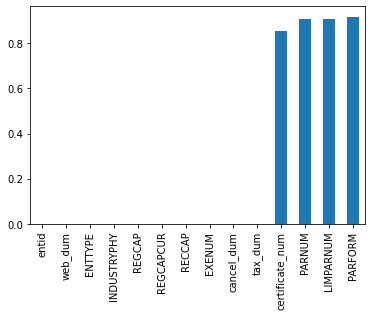

In [7]:
# 5 base数据
base = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/company_base_info.csv")
#base= base[ ['entid', 'web_dum', 'ENTTYPE', 'INDUSTRYPHY',"REGCAP","REGCAPCUR", "RECCAP" ,"EXENUM" ,"cancel_dum" ,"tax_dum"]]
base.drop(['brand_num', 'honor_num', 'illegad_num', "yea_sub", 'brand_num'], axis=1, inplace=True)


#print(base.groupby('entid')[['REGCAPCUR', "REGCAP"]])
base["EXENUM"] = base["EXENUM"].fillna(base["EXENUM"].mean())
base["REGCAPCUR"] = base["REGCAPCUR"].fillna(156) # 补充缺失值
base["REGCAPCUR"] = base['REGCAPCUR'].astype('int')


def insert_cap(s):
    condition1 = base["REGCAP"].isnull()
    condition2 = base["RECCAP"].isnull()
    base["REGCAP"][condition1] = base["RECCAP"]
    base["RECCAP"][condition2] = base["REGCAP"]

    s["REGCAP"] = s["REGCAP"].fillna(s["REGCAP"].median())
    s["RECCAP"] = s["RECCAP"].fillna(s["RECCAP"].median())
    return s

def change_cap(s):
    condition1 = (base['REGCAPCUR']==156)
    condition2 = (base['REGCAPCUR']==840)
    condition3 = (base['REGCAPCUR']==344)

    
    s["REGCAP"][condition2]= 6.49*s["REGCAP"]
    s["RECCAP"][condition2]= 6.49* s["RECCAP"] 
 
    s["REGCAP"][condition3]= 0.84*s["REGCAP"]
    s["RECCAP"][condition3]= 0.84* s["RECCAP"] 

    return s


base = change_cap(base)
base = insert_cap(base)


# 求交集
inner_base = label.merge(base, on='entid', how='left') #根据索引交集拼接
inner_base.info()

print(base.entid[base.entid.isin(label.entid)].nunique()) # 415

# nan可视化
missing = inner_base.isnull().sum()/len(inner_base)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()




In [8]:
# 6 tax qianshui
tax_qianshui = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/tax_qianshui.csv")

#均值
gb = tax_qianshui.groupby('entid')
df = pd.DataFrame(gb.mean())

# 求交集
inner_tax_qianshui = label.merge(df, on='entid', how='left') #根据交集拼接
inner_tax_qianshui.info()
print(tax_qianshui.entid[tax_qianshui.entid.isin(label.entid)].nunique()) # 37

# nan可视化
missing = inner_tax_qianshui.isnull().sum()/len(inner_tax_qianshui)
missing = missing[missing >=0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_tax_qianshui[inner_tax_qianshui.entid.isin(tax_qianshui.entid)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   entid    1392 non-null   int64  
 1   taxtype  14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 32.6 KB
14


entid   taxtype
7      498015441  8.000000
12     884853596  8.000000
81     796034628  8.000000
185    424989205  8.000000
197    377705656  8.000000
203    882446289  4.923077
336   1020191564  9.000000
339    646618607  9.000000
433    997784389  9.000000
599    505319984  9.000000
866    207081036  9.000000
900    945726753  9.000000
984    244208972  9.000000
1348     7377264  9.000000

In [9]:
# 7 tax com
tax_com = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/tax_company.csv")
tax_com.info()

# 取最后一个年度数据
gb = tax_com.groupby('entid').last()
df = pd.DataFrame(gb)

# 求交集
inner_tax_com = label.merge(df, on='entid', how='left') #根据交集拼接
inner_tax_com.info()
print(tax_com.entid[tax_com.entid.isin(label.entid)].nunique()) # 1146

# nan可视化
missing = inner_tax_com.isnull().sum()/len(inner_tax_com)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_tax_com[inner_tax_com.entid.isin(tax_com.entid)]

#   缺失值补充 众数
inner_tax_com["region_id"] = inner_tax_com["region_id"].fillna(max(inner_tax_com["region_id"].mode()))
inner_tax_com["entertype_tax"] = inner_tax_com["entertype_tax"].fillna(max(inner_tax_com["entertype_tax"].mode()))
inner_tax_com["industry_tax"] = inner_tax_com["industry_tax"].fillna(max(inner_tax_com["industry_tax"].mode()))
inner_tax_com["registertype"] = inner_tax_com["registertype"].fillna(max(inner_tax_com["registertype"].mode()))
inner_tax_com["economic_type"] = inner_tax_com["economic_type"].fillna(max(inner_tax_com["economic_type"].mode()))
inner_tax_com["incometax_rate"] = inner_tax_com["incometax_rate"].fillna(max(inner_tax_com["incometax_rate"].mode()))
inner_tax_com["collection_type"] = inner_tax_com["collection_type"].fillna(max(inner_tax_com["collection_type"].mode()))

inner_tax_com["EMPNUM"] = inner_tax_com["EMPNUM"].fillna(inner_tax_com["EMPNUM"].median())

# 截取cols
usecols = ['entid','CaseType','region_id',"industry_tax", "registertype","economic_type", "incometax_rate","collection_type","EMPNUM"]
inner_tax_com = inner_tax_com[usecols]
inner_tax_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24864 entries, 0 to 24863
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   entid            24864 non-null  int64  
 1   region_id        24864 non-null  int64  
 2   entertype_tax    5339 non-null   float64
 3   industry_tax     5543 non-null   float64
 4   registertype     24864 non-null  int64  
 5   economic_type    24864 non-null  int64  
 6   incometax_rate   12035 non-null  float64
 7   collection_type  24864 non-null  int64  
 8   EMPNUM           21743 non-null  float64
 9   year             19272 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   entid            1392 non-null   int64  
 1   region_id        918 non-null    float6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30346 entries, 0 to 30345
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   entid                        30346 non-null  int64  
 1   year                         30346 non-null  int64  
 2   islatest                     30346 non-null  int64  
 3   profit_loss                  30346 non-null  float64
 4   revenue                      27327 non-null  float64
 5   sales_cost                   25057 non-null  float64
 6   sales_tax                    24846 non-null  float64
 7   sales_expense                22945 non-null  float64
 8   G_expense                    27344 non-null  float64
 9   finance_expense              25860 non-null  float64
 10  asset_devaluation_losses     19465 non-null  float64
 11  fair_value_change            19303 non-null  float64
 12  investment_income            19534 non-null  float64
 13  operation_profit

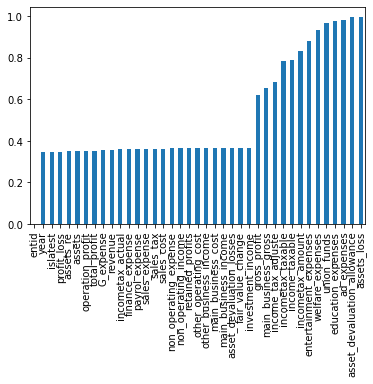

In [10]:
# 8 tax year
tax_year = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/tax_year.csv")
tax_year.info()

# 处理成每年均值
usecols= ["assets","assets_re","operation_profit","total_profit","finance_expense","revenue","sales_tax","non_operating_income","retained_profits"]
gb = tax_year.groupby('entid')
df = pd.DataFrame(gb.mean())

# 求交集
inner_tax_year = label.merge(df, on='entid', how='left') #根据交集拼接
inner_tax_year.info()
print(inner_tax_year.entid[inner_tax_year.entid.isin(tax_year.entid)].nunique()) # 212

# nan可视化
missing = inner_tax_year.isnull().sum()/len(inner_tax_year)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_tax_year[inner_tax_year.entid.isin(tax_year.entid)]

#   缺失值补充 均值
for col in usecols:
    inner_tax_year[col] = inner_tax_year[col].fillna(inner_tax_year[col].mean())

inner_tax_year.info()

In [11]:

# 9 tax abn
tax_abn = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/tax_abnormal.csv")
print(tax_abn.entid.nunique(), len(tax_abn.entid)) # 查看是否重复
tax_abn.info()
tax_abn = tax_abn.rename(columns={'ttype':'tttype'})

# 处理成均值
gb = tax_abn.groupby('entid')
df = pd.DataFrame(gb.mean())

# 求交集
inner_tax_abn = label.merge(df, on='entid', how='left') #根据交集拼接
inner_tax_abn.info()
print(inner_tax_abn.entid[inner_tax_abn.entid.isin(tax_abn.entid)].nunique()) # 148

# nan可视化
missing = inner_tax_abn.isnull().sum()/len(inner_tax_abn)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_tax_abn[inner_tax_abn.entid.isin(tax_abn.entid)]


284 359
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entid      359 non-null    int64 
 1   tax_type   359 non-null    int64 
 2   tax_state  359 non-null    int64 
 3   cdate      128 non-null    object
 4   ttype      359 non-null    int64 
 5   province   359 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 17.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entid      1392 non-null   int64  
 1   tax_type   29 non-null     float64
 2   tax_state  29 non-null     float64
 3   tttype     29 non-null     float64
 4   province   29 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 65.2 KB
29


entid  tax_type  tax_state  tttype  province
6     1116571015       1.0        0.0     2.0       1.0
7      498015441       1.0        0.0     1.0       2.0
12     884853596       1.0        0.0     1.0       2.0
22     690756846       1.0        0.0     1.0       2.0
51     899568771       1.0        0.0     1.0       2.0
70     278469566       1.0        0.0     1.0       2.0
79     162729196       1.0        0.0     1.0       2.0
81     796034628       1.0        0.0     1.0       2.0
103    842088100       1.0        0.0     1.0       2.0
127    726735583       1.0        0.0     1.0       2.0
153    236203073       1.0        0.0     1.0       2.0
159    152935696       1.0        0.0     1.0       2.0
167    908910575       1.0        0.0     1.0       2.0
169    435933247       1.0        0.0     1.0       2.0
170    886830685       1.0        0.0     1.0       2.0
172    159157541       1.0        0.0     1.0       2.0
179    545110976       1.0        0.0     1.0       2.0
185    424989205       0.0        0.0     1.0       0.0
197    377705656       1.0        0.0     1.0       2.0
203    882446289       1.0        0.0     2.0       1.0
221    779928235       1.0        0.0     1.0       2.0
339    646618607       0.0        3.0     1.0       2.0
615    595732139       4.0        0.0     1.0       8.0
640    975529059       4.0        0.0     1.0       8.0
680    361015755       4.0        1.0     2.0       5.0
702    166869326       4.0        3.0     2.0       5.0
767    196371498       4.0        0.0     1.0       8.0
984    244208972       4.0        3.0     2.0       9.0
1079   690187757       4.0        0.0     1.0       3.0

In [12]:
# 10 socialfee
socialfee = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/company_ar_socialfee.csv")
socialfee = socialfee.iloc[:, 0:21] # so5后面的columns没有用
socialfee.rename(columns={'ANCHEYEAR':'ANCHEYEAR_socialfee'}, inplace=True)
#socialfee.info()

# 处理成均值
gb = socialfee.groupby('entid')
df = pd.DataFrame(gb.mean())

# 求交集
inner_socialfee = label.merge(df, on='entid', how='left') #根据交集拼接
inner_socialfee.info()
print(inner_socialfee.entid[inner_socialfee.entid.isin(socialfee.entid)].nunique()) # 42


# nan可视化
missing = inner_socialfee.isnull().sum()/len(inner_socialfee)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_socialfee[inner_socialfee.entid.isin(socialfee.entid)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entid                1392 non-null   int64  
 1   ispublic             33 non-null     float64
 2   ANCHEYEAR_socialfee  33 non-null     float64
 3   so1                  33 non-null     float64
 4   so2                  33 non-null     float64
 5   so3                  33 non-null     float64
 6   so4                  33 non-null     float64
 7   so5                  33 non-null     float64
 8   totalWagesSo1        32 non-null     float64
 9   totalWagesSo2        32 non-null     float64
 10  totalWagesSo3        32 non-null     float64
 11  totalWagesSo5        32 non-null     float64
 12  totalPaymentSo1      32 non-null     float64
 13  totalPaymentSo2      32 non-null     float64
 14  totalPaymentSo3      32 non-null     float64
 15  totalPaymentSo4      32 non-null     f

entid  ispublic  ANCHEYEAR_socialfee        so1        so2  \
10     545175795       1.0               2017.0   0.184111   1.443548   
14     945933571       1.0               2017.0  11.387327  12.409792   
19     950966820       1.0               2016.0   1.091567  -0.270850   
23     559790998       1.0               2018.0  -0.844474   0.585012   
30     923590000       1.0               2017.0   1.393904  -0.012293   
...          ...       ...                  ...        ...        ...   
1387  1038922858       NaN                  NaN        NaN        NaN   
1388   589212093       NaN                  NaN        NaN        NaN   
1389  1099901168       NaN                  NaN        NaN        NaN   
1390   109730814       NaN                  NaN        NaN        NaN   
1391    50478809       NaN                  NaN        NaN        NaN   

            so3        so4        so5  totalWagesSo1  totalWagesSo2  ...  \
10    -0.237798  -0.727419   0.380459      -1.590659       0.579311  ...   
14    10.400898  11.219271  10.245836       0.482878      -0.868947  ...   
19    -1.792547   0.090781  -0.301946       0.543310      -0.008322  ...   
23     1.320390   0.284028   0.464422      -0.701755      -0.160306  ...   
30    -0.243173   0.300937   1.122681      -0.093052      -2.325665  ...   
...         ...        ...        ...            ...            ...  ...   
1387        NaN        NaN        NaN            NaN            NaN  ...   
1388        NaN        NaN        NaN            NaN            NaN  ...   
1389        NaN        NaN        NaN            NaN            NaN  ...   
1390        NaN        NaN        NaN            NaN            NaN  ...   
1391        NaN        NaN        NaN            NaN            NaN  ...   

      totalWagesSo5  totalPaymentSo1  totalPaymentSo2  totalPaymentSo3  \
10        -0.913823        -0.479793        -0.717678         0.951218   
14        -0.231842        11.951164        13.116488        11.854081   
19         2.535387        -0.553118         1.270562        -0.369847   
23        -0.830273        -0.090852         0.836112         0.366408   
30         0.772156        -1.158313        -0.993055         0.176626   
...             ...              ...              ...              ...   
1387            NaN              NaN              NaN              NaN   
1388            NaN              NaN              NaN              NaN   
1389            NaN              NaN              NaN              NaN   
1390            NaN              NaN              NaN              NaN   
1391            NaN              NaN              NaN              NaN   

      totalPaymentSo4  totalPaymentSo5  unPaidSocialInsSo1  \
10          -1.881781         1.146006            1.504715   
14          11.778138        12.184305            0.062999   
19          -0.575188        -1.162473           -0.234386   
23           0.542394         1.058267           -0.691317   
30           0.109477         0.269368           -0.207270   
...               ...              ...                 ...   
1387              NaN              NaN                 NaN   
1388              NaN              NaN                 NaN   
1389              NaN              NaN                 NaN   
1390              NaN              NaN                 NaN   
1391              NaN              NaN                 NaN   

      unPaidSocialInsSo2  unPaidSocialInsSo3  unPaidSocialInsSo4  
10             -0.680665           -1.036639           -0.726002  
14              0.149197           -1.645765           -0.633770  
19              2.563422           -0.303720            0.132835  
23             -1.390906           -1.764530           -1.279605  
30              1.893954           -0.110841            0.284301  
...                  ...                 ...                 ...  
1387                 NaN                 NaN                 NaN  
1388                 NaN                 NaN       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   entid         1392 non-null   int64  
 1   ANCHEYEAR_ar  1297 non-null   float64
 2   EMPNUM_ar     1214 non-null   float64
 3   WOMEMPNUM     1068 non-null   float64
 4   BUSST         1297 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 65.2 KB
1297
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   entid         1392 non-null   int64  
 1   ANCHEYEAR_ar  1392 non-null   float64
 2   EMPNUM_ar     1392 non-null   float64
 3   WOMEMPNUM     1392 non-null   float64
 4   BUSST         1392 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 65.2 KB


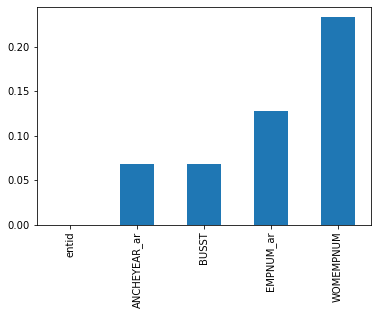

In [13]:
# 11 ar
ar = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/company_ar.csv")
ar.rename(columns={'ANCHEYEAR':'ANCHEYEAR_ar'}, inplace=True)
ar.rename(columns={'EMPNUM':'EMPNUM_ar'}, inplace=True)
# 处理成均值
gb = ar.groupby('entid')
df = pd.DataFrame(gb.mean())

# 求交集
inner_ar = label.merge(df, on='entid', how='left') #根据交集拼接
inner_ar.info()
print(inner_ar.entid[inner_ar.entid.isin(ar.entid)].nunique()) # 225


# nan可视化
missing = inner_ar.isnull().sum()/len(inner_ar)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_ar[inner_ar.entid.isin(ar.entid)]

#   缺失值补充 均值
usecols = ["ANCHEYEAR_ar","EMPNUM_ar","BUSST","WOMEMPNUM"]
for col in usecols:
    inner_ar[col] = inner_ar[col].fillna(inner_ar[col].mean())

inner_ar.info()


In [14]:
# 12 modify
modify = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/company_modify.csv")
#modify.info()
# 处理成均值
gb = modify.groupby('entid')
df = pd.DataFrame(gb.mean())

# 求交集
inner_modify = label.merge(df, on='entid', how='left') #根据交集拼接
inner_modify.info()
print(inner_modify.entid[inner_modify.entid.isin(modify.entid)].nunique()) # 207

# nan可视化
missing = inner_modify.isnull().sum()/len(inner_modify)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_modify[inner_modify.entid.isin(modify.entid)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   entid    1392 non-null   int64  
 1   ALTTIME  416 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 32.6 KB
901


entid   ALTTIME
0      952329218       NaN
1      421844157       NaN
2      475255424       NaN
3      486671830  1.000000
4      510117950  5.000000
...          ...       ...
1383   677588828       NaN
1386   655206172       NaN
1387  1038922858  1.555556
1389  1099901168  0.000000
1391    50478809       NaN

[901 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   entid           1392 non-null   int64  
 1   entid_inv       372 non-null    float64
 2   CONAM_before    344 non-null    float64
 3   CONAM_after     314 non-null    float64
 4   CONPROP_before  357 non-null    float64
 5   CONPROP_after   109 non-null    float64
 6   ttype           335 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 87.0 KB
372


entid   entid_inv  CONAM_before  CONAM_after  CONPROP_before  \
7      498015441         0.0     42.289987          NaN       87.216540   
11     324547720  44957948.0    181.137339   178.537066       46.107387   
13     224092091         0.0           NaN   501.415639       -0.943890   
18     327183771         0.0     48.516701    50.742124       49.320591   
23     559790998   5182089.0    999.152420  1001.974795       99.728625   
...          ...         ...           ...          ...             ...   
1370   789380757    452941.0   1000.600879          NaN       99.890171   
1372    33498527         0.0    101.477192          NaN       99.211034   
1379   809128331         0.0     33.172947    33.943952       70.177346   
1387  1038922858         0.0           NaN          NaN             NaN   
1389  1099901168         0.0   1000.337657  1001.111079       98.929317   

      CONPROP_after  ttype  
7               NaN    4.0  
11              NaN    2.0  
13       100.920221    3.0  
18              NaN    2.0  
23              NaN    2.0  
...             ...    ...  
1370            NaN    4.0  
1372            NaN    4.0  
1379            NaN    2.0  
1387            NaN    4.0  
1389            NaN    2.0  

[372 rows x 7 columns]

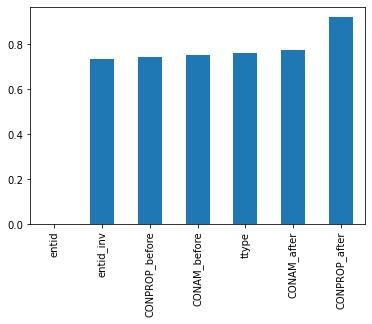

In [15]:

# 13 his_inv
his_inv = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/el_company_history_inv.csv")

# 处理成均值
gb = his_inv.groupby('entid')
df = pd.DataFrame(gb.mean())

# 求交集
inner_hisinv = label.merge(df, on='entid', how='left') #根据交集拼接
inner_hisinv.info()
print(inner_hisinv.entid[inner_hisinv.entid.isin(his_inv.entid)].nunique()) #  340

# nan可视化
missing = inner_hisinv.isnull().sum()/len(inner_hisinv)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_hisinv[inner_hisinv.entid.isin(his_inv.entid)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   entid   1392 non-null   int64  
 1   NAME    560 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 32.6 KB
560
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   entid   1392 non-null   int64  
 1   NAME    1392 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 32.6 KB


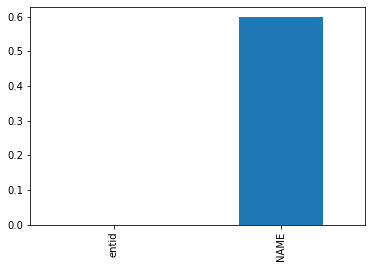

In [16]:
# 14 his_mg
his_mg = pd.read_csv("./Online_Data/trainning_data/corporate_attributes/el_company_history_manager.csv")

# 处理成均值

gb = his_mg.groupby('entid')['NAME'] 

df = pd.DataFrame(gb.count())# 随便取一个NAME计数

# 求交集
inner_hismg = label.merge(df, on='entid', how='left') #根据交集拼接
inner_hismg.info()
print(inner_hismg.entid[inner_hismg.entid.isin(his_mg.entid)].nunique()) #  1212

# nan可视化
missing = inner_hismg.isnull().sum()/len(inner_hismg)
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 与风险类型关系
inner_hismg[inner_hismg.entid.isin(his_mg.entid)]

#   缺失值补充 均值
usecols = ["NAME"]
for col in usecols:
    inner_hismg[col] = inner_hismg[col].fillna(inner_hismg[col].mean())
inner_hismg.info()


In [17]:


dfs=[  inner_ar, inner_base, inner_tax_com, inner_tax_year, inner_tax_abn,  inner_socialfee, inner_hismg ]
#dfs = [inner_ar,inner_assets, inner_base, inner_hisinv, inner_hismg, inner_modify, inner_socialfee, inner_stock, inner_tax_abn,inner_tax_com,inner_tax_qianshui, inner_tax_year]
print(len(df))

new_df = pd.concat([df.iloc[:, 2:] for df in dfs], axis=1, join='outer')
new_df = pd.concat([label, new_df], axis=1, join='outer')

new_df.info()
new_df



4978
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   entid                        1392 non-null   int64  
 1   ANCHEYEAR_ar                 1392 non-null   float64
 2   EMPNUM_ar                    1392 non-null   float64
 3   WOMEMPNUM                    1392 non-null   float64
 4   BUSST                        1392 non-null   float64
 5   web_dum                      1392 non-null   int64  
 6   ENTTYPE                      1392 non-null   int64  
 7   INDUSTRYPHY                  1392 non-null   int64  
 8   REGCAP                       1392 non-null   float64
 9   REGCAPCUR                    1392 non-null   int64  
 10  RECCAP                       1392 non-null   float64
 11  PARNUM                       131 non-null    float64
 12  LIMPARNUM                    131 non-null    float64
 13  PARFORM      

entid  ANCHEYEAR_ar  EMPNUM_ar  WOMEMPNUM      BUSST  web_dum  \
0      952329218   2015.890838  14.584171   8.157459  13.737530        0   
1      421844157   2016.000000   7.600000   5.666667  13.000000        0   
2      475255424   2015.500000  10.666667  13.000000   5.000000        0   
3      486671830   2015.890838  14.584171   8.157459  13.737530        0   
4      510117950   2015.500000  85.333333  76.666667   3.666667        0   
...          ...           ...        ...        ...        ...      ...   
1387  1038922858   2015.500000  10.500000   4.333333  15.333333        0   
1388   589212093   2015.500000   9.500000   5.333333   8.666667        0   
1389  1099901168   2015.500000   5.333333   6.666667  15.500000        0   
1390   109730814   2017.500000  12.000000   1.500000  22.000000        0   
1391    50478809   2015.500000   4.750000   2.333333  12.500000        0   

      ENTTYPE  INDUSTRYPHY  REGCAP  REGCAPCUR  ...  totalPaymentSo1  \
0           3           11     3.0        156  ...              NaN   
1           5           11  2000.0        156  ...              NaN   
2           3           11  1000.0        156  ...              NaN   
3           5           11   100.0        156  ...              NaN   
4          18            8     0.0        156  ...              NaN   
...       ...          ...     ...        ...  ...              ...   
1387        5            0    70.0        156  ...              NaN   
1388        5            5    51.0        156  ...              NaN   
1389        7            9  1000.0        156  ...              NaN   
1390        7            1   160.0        156  ...              NaN   
1391       65            5     5.0        156  ...              NaN   

      totalPaymentSo2  totalPaymentSo3 totalPaymentSo4  totalPaymentSo5  \
0                 NaN              NaN             NaN              NaN   
1                 NaN              NaN             NaN              NaN   
2                 NaN              NaN             NaN              NaN   
3                 NaN              NaN             NaN              NaN   
4                 NaN              NaN             NaN              NaN   
...               ...              ...             ...              ...   
1387              NaN              NaN             NaN              NaN   
1388              NaN              NaN             NaN              NaN   
1389              NaN              NaN             NaN              NaN   
1390              NaN              NaN             NaN              NaN   
1391              NaN              NaN             NaN              NaN   

      unPaidSocialInsSo1  unPaidSocialInsSo2  unPaidSocialInsSo3  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
1387                 NaN                 NaN                 NaN   
1388                 NaN                 NaN                 NaN   
1389                 NaN                 NaN                 NaN   
1390                 NaN                 NaN                 NaN   
1391                 NaN                 NaN                 NaN   

      unPaidSocialInsSo4      NAME  
0                    NaN  1.000000  
1                    NaN  2.142857  
2                    NaN  2.142857  
3                    NaN  2.142857  
4                    NaN  1.000000  
...                  ...       ...  
1387                 NaN  3.000000  
1388                 NaN  2.142857  
1389                 NaN  2.142857  
1390                 NaN  2.142857  
1391                 NaN  2.142857  

[1392 rows x 88 columns]

In [18]:
new_df.to_csv(csv_name)
data = new_df

In [19]:
numerical_fea = list(data.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data.columns)))


In [20]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data,numerical_fea)
numerical_serial_fea

['entid',
 'ANCHEYEAR_ar',
 'EMPNUM_ar',
 'WOMEMPNUM',
 'BUSST',
 'ENTTYPE',
 'INDUSTRYPHY',
 'REGCAP',
 'RECCAP',
 'region_id',
 'registertype',
 'economic_type',
 'EMPNUM',
 'year',
 'profit_loss',
 'revenue',
 'sales_cost',
 'sales_tax',
 'sales_expense',
 'G_expense',
 'finance_expense',
 'asset_devaluation_losses',
 'fair_value_change',
 'investment_income',
 'operation_profit',
 'non_operating_income',
 'non_operating_expense',
 'total_profit',
 'assets',
 'assets_re',
 'payrol_expense',
 'welfare_expenses',
 'education_expenses',
 'union_funds',
 'ad_expenses',
 'entertainment_expenses',
 'main_business_income',
 'main_business_cost',
 'other_business_income',
 'other_operating_cost',
 'retained_profits',
 'gross_profit',
 'main_business_gross',
 'income_tax_adjuste',
 'income_taxable',
 'incometax_taxable',
 'incometax_amount',
 'incometax_actual',
 'so1',
 'so2',
 'so3',
 'so4',
 'so5',
 'totalWagesSo1',
 'totalWagesSo2',
 'totalWagesSo3',
 'totalWagesSo5',
 'totalPaymentSo1',

In [21]:
numerical_noserial_fea

['web_dum',
 'REGCAPCUR',
 'PARNUM',
 'LIMPARNUM',
 'EXENUM',
 'cancel_dum',
 'certificate_num',
 'tax_dum',
 'industry_tax',
 'incometax_rate',
 'collection_type',
 'islatest',
 'assets_loss',
 'asset_devaluation_allowance',
 'tax_type',
 'tax_state',
 'tttype',
 'province',
 'ispublic',
 'ANCHEYEAR_socialfee']

In [22]:
# 离散数值类别型变量分析
data['collection_type'].value_counts()

2.0    1357
0.0      29
1.0       6
Name: collection_type, dtype: int64

In [23]:
# 连续数值类别型变量分析
#每个数字特征得分布可视化
f = pd.melt(data, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [24]:
# 非数值变量分析
category_fea

['PARFORM']

In [25]:
# import pandas_profiling
# pfr = pandas_profiling.ProfileReport(data)
# pfr.to_file("./example.html")

In [26]:
print(new_df.columns.nunique())
data_train =pd.read_csv('./data_train_less.csv')
data_test = pd.read_csv('./data_test_less.csv')


for c in data_train.columns.unique():
    if not c in data_test.columns.unique():
        print(c)

for c in data_test.columns.unique():
    if not c in data_train.columns.unique():
        print('xxxx',c)

data_train['industry_tax']


88


FileNotFoundError: [Errno 2] No such file or directory: './data_train_less.csv'